IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#IMPORTING TRAINING DATA SET.
fake_news_data = pd.read_csv('/content/drive/MyDrive/fake_news_NLP_Project/train.csv')

In [ ]:
fake_news_data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


DATA PRE PROCESSING

In [ ]:
fake_news_data = fake_news_data.dropna(subset=['label'], axis=0)
fake_news_data = fake_news_data.dropna(how="all")

In [ ]:
df = fake_news_data.copy() 
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
df['title'] = df['title'].fillna(" ") 

In [ ]:
df['author'] = df['author'].fillna(" ")
df['text'] = df['text'].fillna(" ")

DATA STATISTICS

In [ ]:
ttl = [titl for titl in df.title]
max_len_ttl = 0
ttl_len = []
for title in ttl:
    ttl_len.append(len(title.split()))
    max_len_ttl = max(len(title.split()), max_len_ttl)


txt = [text for text in df.text]
max_len_txt = 0
txt_len = []
for text in txt:
    txt_len.append(len(text.split()))
    max_len_txt = max(len(text.split()), max_len_txt)

print('Number of titles:', len(ttl))
print('Max length of the titles:', max_len_ttl)
print('Mean length of the titles:', np.mean(ttl_len))

print('Max length of the text:', max_len_txt)
print('Mean length of the text:', np.mean(txt_len))

Number of titles: 20800
Max length of the titles: 72
Mean length of the titles: 12.0875
Max length of the text: 24234
Mean length of the text: 758.8825480769231


GRAPHS FOR TITLES

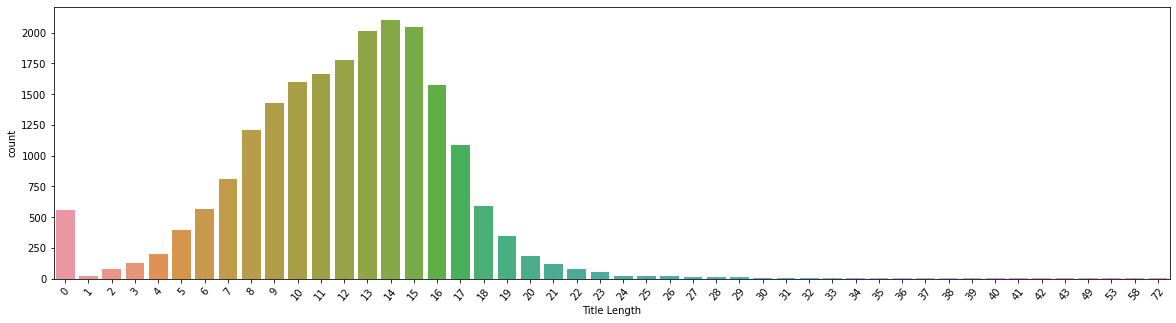

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=ttl_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.xlabel('Title Length')
plt.show()


CONCATINATING 3 DATA SETS 

In [ ]:
df['fake_news_data'] = df['title'] + " " + df['author'] + " " + df['text']

In [ ]:
df.head(7)

,id,title,author,text,label,fake_news_data
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Jackie Mason: Hollywood Would Love Trump if He...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite ...


In [ ]:
X = df.drop(columns = ['label', 'title', 'author', 'text', 'id'])
y = df['label']

REMOVING PUNCTUATIONS AND STOP WORDS

In [ ]:
from nltk.stem.porter import PorterStemmer
import re
cache = set(stopwords.words("english"))
print(cache)
def pre_processing(msg) :
  corpus_test = []
  for i in range(len(msg)):
    review = re.sub('[^a-zA-Z]',' ',msg[i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in cache]
    review = ' '.join(review)
    corpus_test.append(review)

  return corpus_test

{'they', "you'll", 'into', "mustn't", 'should', 'which', 'of', 'aren', 'over', 'ain', 'weren', 'himself', 'me', 's', 'off', 'then', 're', 'couldn', 'an', 'below', 'wasn', 'he', "haven't", 'such', "wasn't", "shan't", 'above', 'but', 'you', 'didn', 'our', 'being', 'on', 'won', 'don', "aren't", 'about', 'its', 'up', 'is', 'ma', 'my', "you'd", 'have', 'him', 'both', "should've", 'having', 'who', 'until', 'them', "didn't", "it's", 'd', 'only', 'ourselves', 'no', 'and', 'y', 'nor', 'yourself', 'under', 'their', 'than', 'not', 'shan', 'if', 'at', 'she', 'to', 'now', 'does', 'doing', 'or', 'hasn', "you're", "wouldn't", "don't", "weren't", "she's", 'a', 'while', 'myself', 'hadn', 'in', 'most', 'be', 'i', 'themselves', 'yours', 'hers', 'his', 'we', "hadn't", 'each', 't', 'for', 'what', 'am', 'had', 'where', 'how', 'wouldn', 'against', 'that', 'further', 'has', 'll', 'any', 'these', 'few', 'mightn', "that'll", 'this', 'own', 'it', 'ours', 'once', 'her', 'down', "shouldn't", 'between', 'herself', 

In [ ]:
corpus =  pre_processing(X['fake_news_data'])


APPLYING TFIDF VECTORIZER

In [ ]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
x = tfidf.fit_transform(corpus)

In [ ]:
pickle.dump(x, open('/content/drive/MyDrive/fake_news_NLP_Project/Vectorizer/tfidf.pickle', 'wb'))

In [ ]:
# x = pickle.load(open('/content/drive/MyDrive/Vectorizer/tfidf.pickle', 'rb'))

In [ ]:
models_score = {}
models_cm = {}

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
clf= MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'multinomialNB.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
models_score['Multinomial NB'] = score
models_cm['Multinomial NB'] = cm

accuracy:   0.911


In [ ]:
clf= LogisticRegression(max_iter=200)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'LogisticRegression.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
models_score['Logistic Regression'] = score
models_cm['Logistic Regression'] = cm

accuracy:   0.962


In [ ]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'DecisionTreeClassifier.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
models_score['Decision Tree Classifier'] = score
models_cm['Decision Tree Classifier'] = cm

accuracy:   0.956


In [ ]:
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'RandomForestClassifier.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
models_score['Random Forest Classifier'] = score
models_cm['Random Forest Classifier'] = cm

accuracy:   0.974


In [ ]:
#Passive - aggressive clasifier
#It works by responding as passive for correct classifications and responding as aggressive for any miscalculation.
#C : This is the regularization parameter, and denotes the penalization the model will make on an incorrect prediction
#The regularization parameter reduces overfitting, which reduces the variance of your estimated regression parameters
from sklearn.linear_model import PassiveAggressiveClassifier
model_pa = PassiveAggressiveClassifier(C = 0.6, random_state = 5)
model_pa.fit(x_train, y_train)
test_pred = model_pa.predict(x_test)
score = accuracy_score(y_test, test_pred)
print(f"Test Set Accuracy : {score} %\n\n")  
cm = confusion_matrix(y_test,pred)
print(f"Classification Report : \n\n{classification_report(y_test, test_pred)}")
models_score['Passive Aggressive'] = score
models_cm['Passive Aggressive'] = cm

Test Set Accuracy : 0.9658653846153846 %


Classification Report : 

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2057
           1       0.97      0.97      0.97      2103

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [ ]:
#one-hot representation


In [ ]:
vc_sz=5000
onehot_rep = [one_hot(words, vc_sz) for words in corpus]

In [ ]:
embd = pad_sequences(onehot_rep, padding='pre', maxlen=100)

In [ ]:
#creating model
model = Sequential()
model.add(Embedding(vc_sz, 40, input_length=100))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 40)           200000    
                                                                 
 dropout (Dropout)           (None, 100, 40)           0         
                                                                 
 lstm (LSTM)                 (None, 50)                18200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 32)                1632      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3

In [ ]:
X_final=np.array(embd)
y_final=np.array(y)
x_train, x_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2)
model.fit(x_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
260/260 [==============================] - 19s 66ms/step - loss: 0.3469 - accuracy: 0.8374
Epoch 2/5
260/260 [==============================] - 17s 66ms/step - loss: 0.1599 - accuracy: 0.9398
Epoch 3/5
260/260 [==============================] - 17s 67ms/step - loss: 0.1075 - accuracy: 0.9612
Epoch 4/5
260/260 [==============================] - 17s 67ms/step - loss: 0.0704 - accuracy: 0.9742
Epoch 5/5
260/260 [==============================] - 17s 66ms/step - loss: 0.0473 - accuracy: 0.9831


In [ ]:
model.save('/content/drive/MyDrive/fake_news_NLP_Project/models/lstm_one_hot.h5')

In [ ]:
from keras.models import load_model
mdl = load_model('/content/drive/MyDrive/fake_news_NLP_Project/models/lstm_one_hot.h5')

y_pred=(mdl.predict(x_test)>=0.5).astype(int)
accuracy_score(y_test,y_pred)

0.9081730769230769

In [ ]:
# ebd_feat = 40
# model  = Sequential()
# model.add(Embedding(voc_size, ebd_feat, input_length=25))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(100)))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()


In [ ]:
# model.fit(x_train,y_train,epochs=3,validation_data=(x_test, y_test), batch_size=64)

In [ ]:
# y_pred=(model.predict(x_test)>=0.5).astype(int)
# accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cVect = CountVectorizer(max_features=5000)
x = cVect.fit_transform(corpus)

In [ ]:
cv_models_score = {}
cv_models_cm = {}

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
clf= MultinomialNB()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'multinomialNB_cv.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
cv_models_score['Multinomial NB'] = score
cv_models_cm['Multinomial NB'] = cm

accuracy:   0.892


In [ ]:
clf= LogisticRegression()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'LogisticRegression_cv.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
cv_models_score['Logistic Regression'] = score
cv_models_cm['Logistic Regression'] = cm

accuracy:   0.963


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf= DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'DecisionTreeClassifier_cv.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
cv_models_score['Decision Tree Classifier'] = score
cv_models_cm['Decision Tree Classifier'] = cm

accuracy:   0.943


In [ ]:
clf= RandomForestClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test,pred)

filename = 'RandomForestClassifier_cv.sav'
pickle.dump(clf, open('/content/drive/MyDrive/fake_news_NLP_Project/models/'+filename, 'wb'))
cv_models_score['Random Forest Classifier'] = score
cv_models_cm['Random Forest Classifier'] = cm

accuracy:   0.969


In [ ]:
for model in cv_models_score : 
    print(model, " ", cv_models_score[model])

Multinomial NB   0.8918269230769231
Logistic Regression   0.9632211538461538
Decision Tree Classifier   0.9427884615384615
Random Forest Classifier   0.96875


In [ ]:
for model in models_score : 
    print(model, " ", models_score[model])

Multinomial NB   0.9108173076923077
Logistic Regression   0.9617788461538461
Decision Tree Classifier   0.9564903846153846
Random Forest Classifier   0.9742788461538462
Passive Aggressive   0.9658653846153846


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_to_index = tokenizer.word_index
x = tokenizer.texts_to_sequences(corpus)

In [ ]:
voc_sz =  len(word_to_index)   #defining the total vocabulary size
oov_tok = "UNK"     #setting out of vocabulary token to Unknown
max_len = 250    #defining the maximum length
emb_dim = 50  #embedding dimensions

In [ ]:
x = pad_sequences(x, maxlen=max_len)

In [ ]:
embeddings_index = {};
with open('/content/drive/MyDrive/fake_news_NLP_Project/Embeddings/glove.6B.50d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((voc_sz+1, emb_dim));
for word, i in word_to_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_sz+1, emb_dim, input_length=max_len, weights=[embeddings_matrix], trainable=True),
    tf.keras.layers.LSTM(32,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 50)           7461550   
                                                                 
 lstm_1 (LSTM)               (None, 250, 32)           10624     
                                                                 
 dropout_3 (Dropout)         (None, 250, 32)           0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
epochs = 4
history = model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=128)
model.save('/content/drive/MyDrive/fake_news_NLP_Project/models/lstm_glove_embedding.h5')

Epoch 1/4
130/130 [==============================] - 51s 369ms/step - loss: 0.5117 - accuracy: 0.7651 - val_loss: 0.3716 - val_accuracy: 0.8490
Epoch 2/4
130/130 [==============================] - 47s 363ms/step - loss: 0.3051 - accuracy: 0.8833 - val_loss: 0.2817 - val_accuracy: 0.8839
Epoch 3/4
130/130 [==============================] - 47s 362ms/step - loss: 0.2090 - accuracy: 0.9240 - val_loss: 0.2278 - val_accuracy: 0.9108
Epoch 4/4
130/130 [==============================] - 52s 402ms/step - loss: 0.1469 - accuracy: 0.9480 - val_loss: 0.2524 - val_accuracy: 0.9094


In [ ]:
mdl = load_model('/content/drive/MyDrive/fake_news_NLP_Project/models/lstm_glove_embedding.h5')
rslt = mdl.evaluate(X_test, y_test)
loss = rslt[0]
accuracy = rslt[1]

print("accuracy : %f" %accuracy)

130/130 [==============================] - 6s 39ms/step - loss: 0.2524 - accuracy: 0.9094
accuracy : 0.909375


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(voc_sz+1, emb_dim, input_length=max_len, weights=[embeddings_matrix], trainable=True),
    tf.keras.layers.Conv1D(filters = 64, kernel_size=1, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 250, 50)           7461550   
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 64)           3264      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 62, 64)           0         
 1D)                                                             
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               